In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2001-2012.csv')
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


In [3]:
years_title = [str(i) for i in range(2001, 2013)]
statesInIndia = df['STATE/UT'].unique()[:-2]
statesInIndia

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY'], dtype=object)

In [4]:
typesOfCases = df['CRIME HEAD'].unique()[:-1]
typesOfCases

array(['INFANTICIDE', 'MURDER OF CHILDREN', 'RAPE OF CHILDREN',
       'KIDNAPPING and ABDUCTION OF CHILDREN', 'FOETICIDE',
       'ABETMENT OF SUICIDE', 'EXPOSURE AND ABANDONMENT',
       'PROCURATION OF MINOR GILRS', 'BUYING OF GIRLS FOR PROSTITUTION',
       'SELLING OF GIRLS FOR PROSTITUTION',
       'PROHIBITION OF CHILD MARRIAGE ACT',
       'OTHER CRIMES AGAINST CHILDREN'], dtype=object)

C:\Users\pspma\AppData\Local\Temp\ipykernel_20528\2733316941.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (12, 8), dpi =  80, facecolor = 'w', edgecolor = 'k')


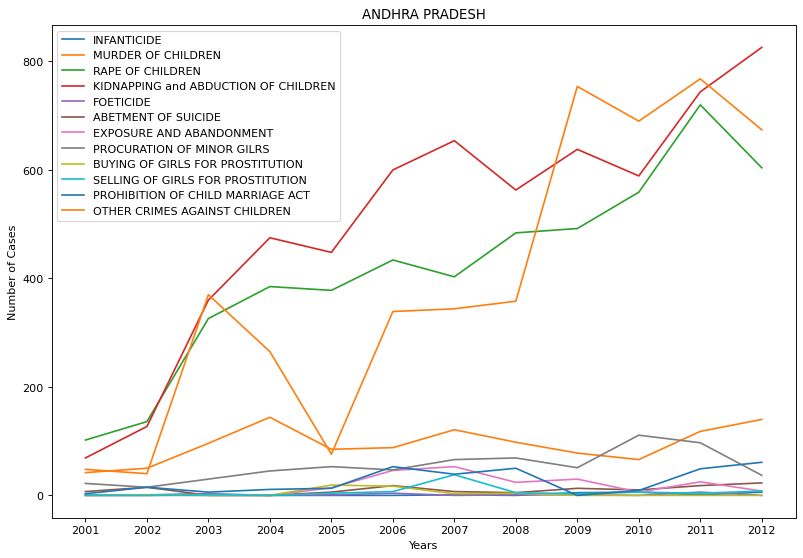

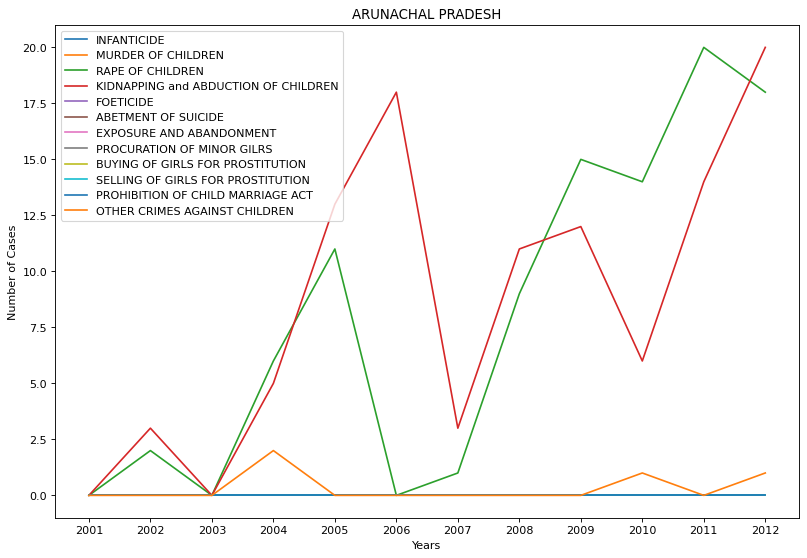

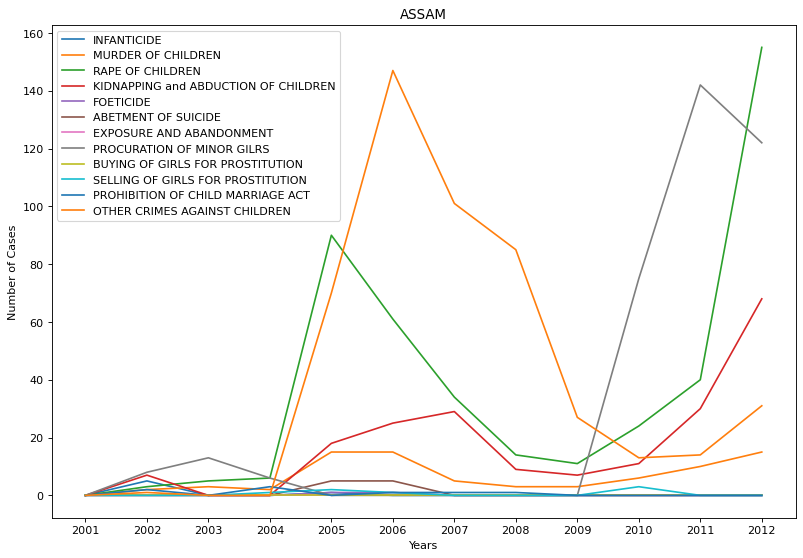

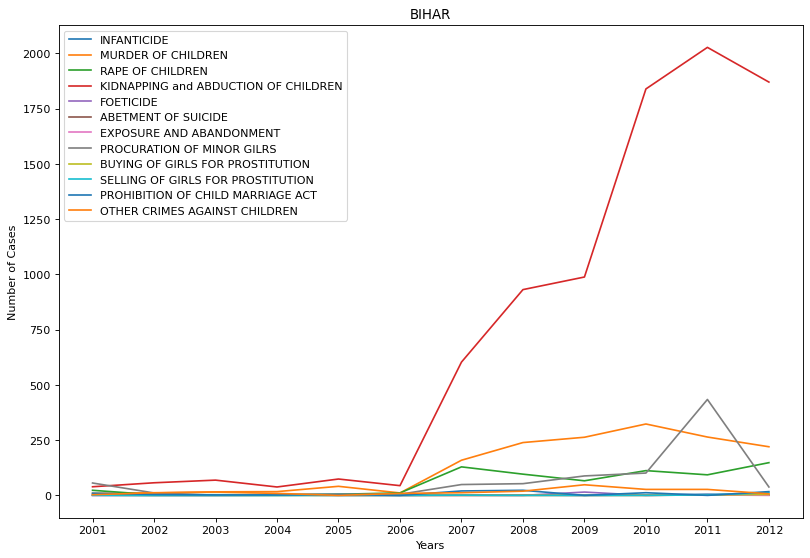

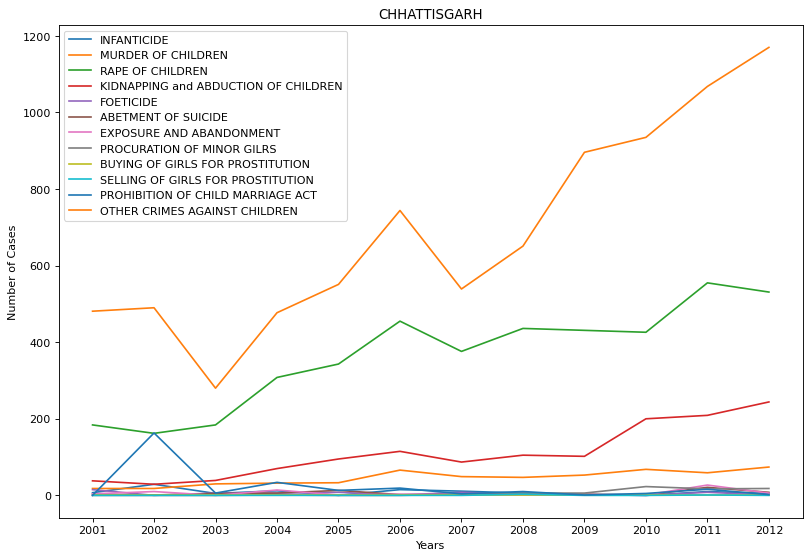

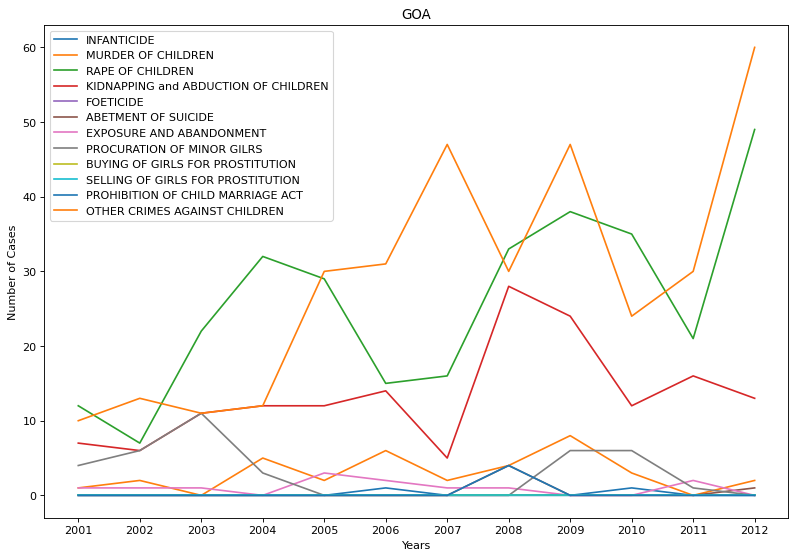

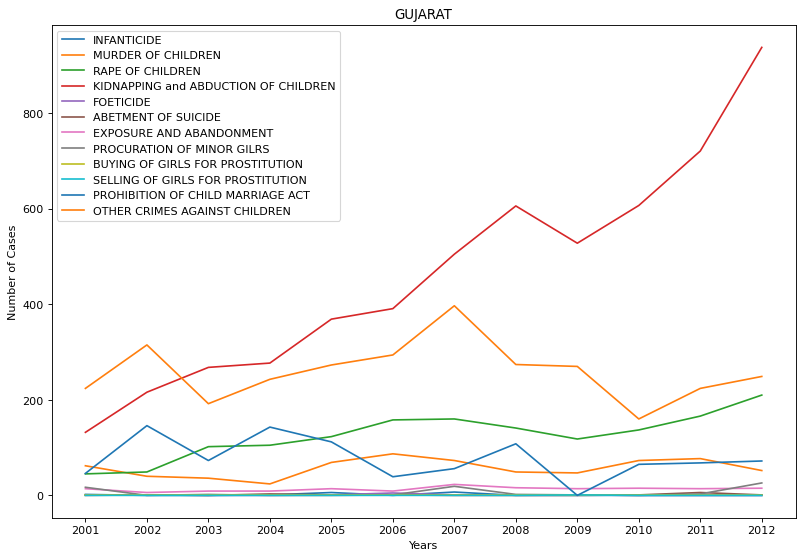

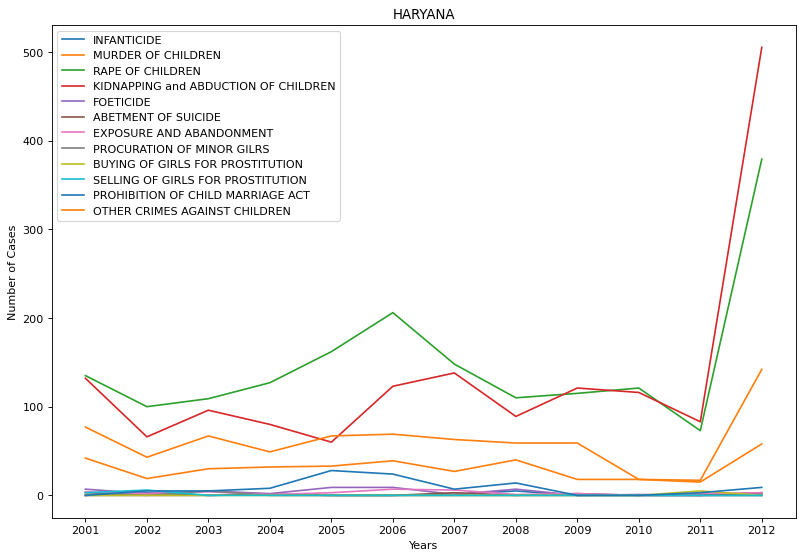

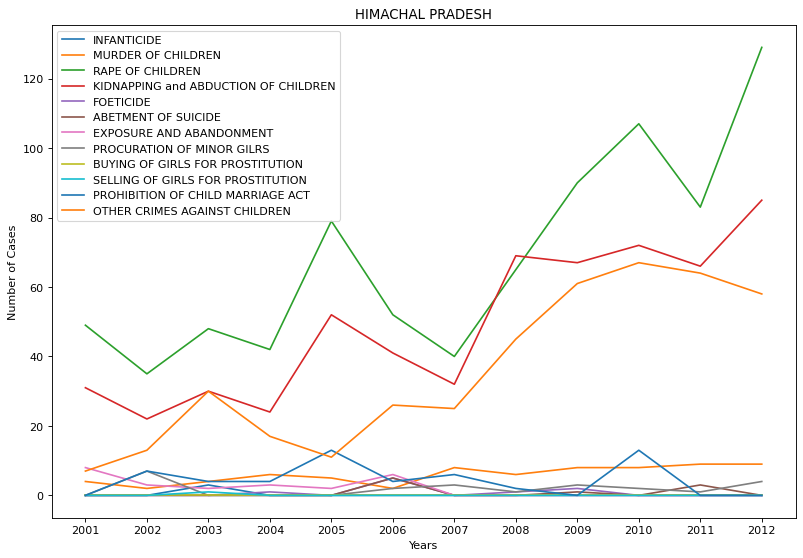

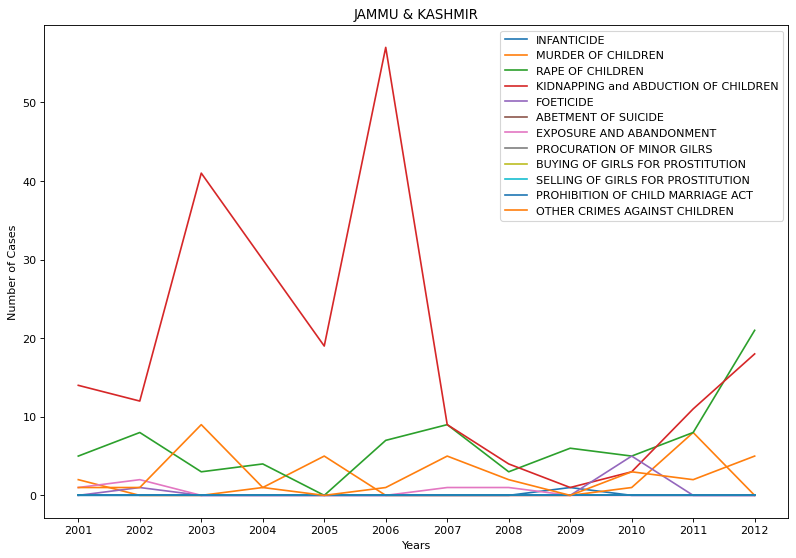

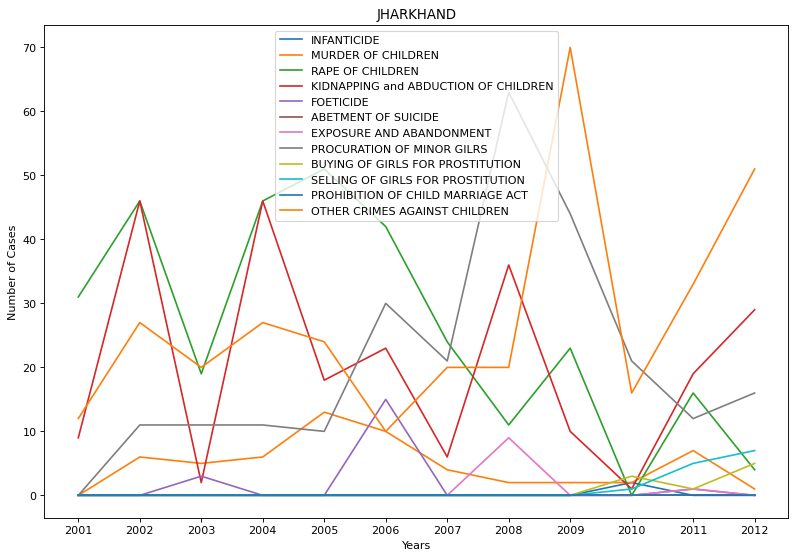

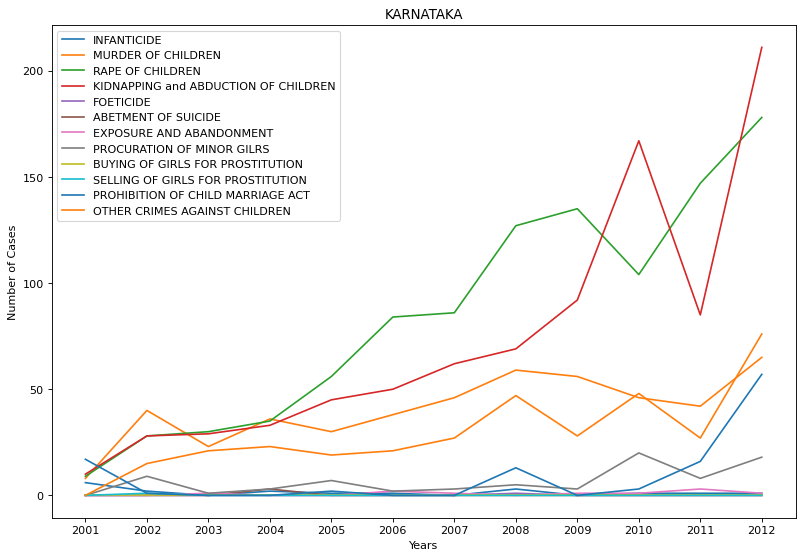

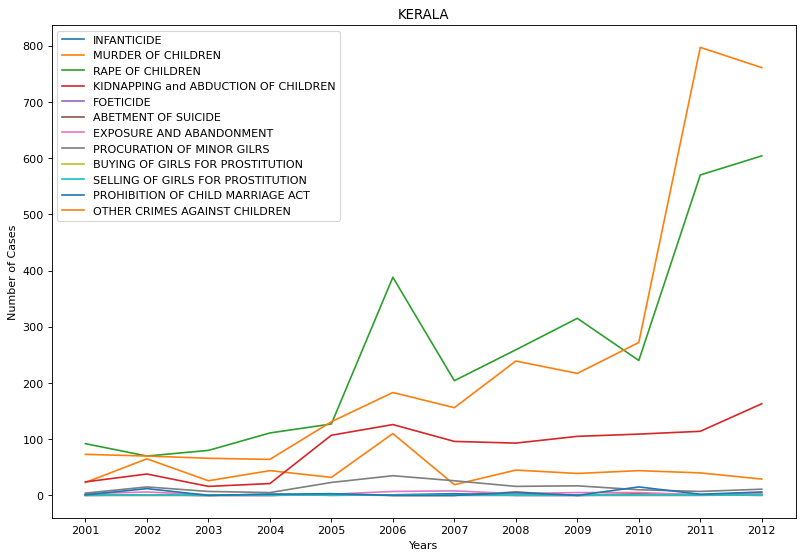

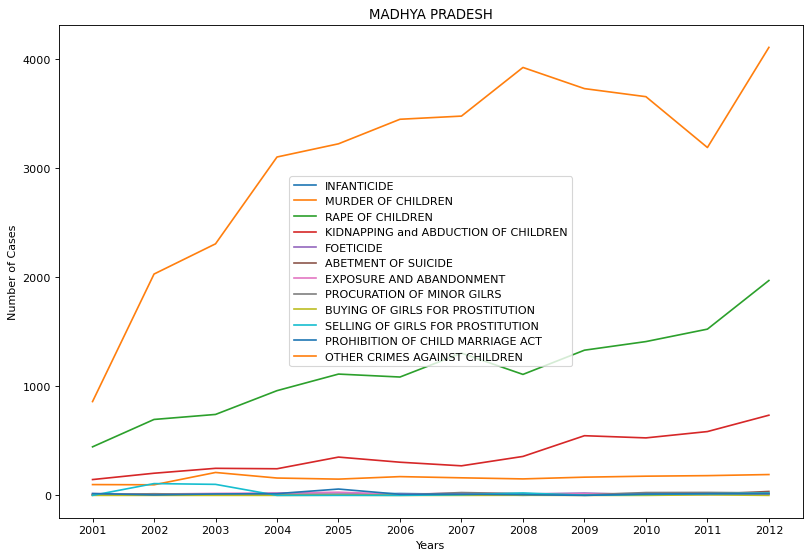

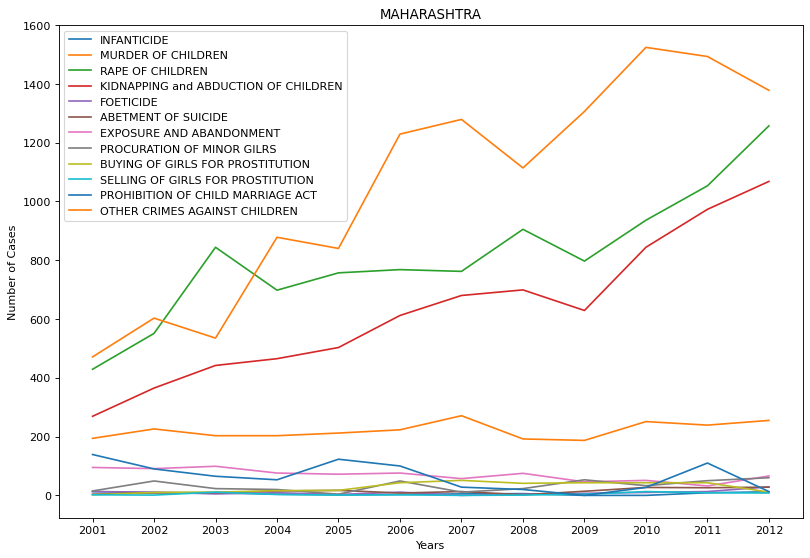

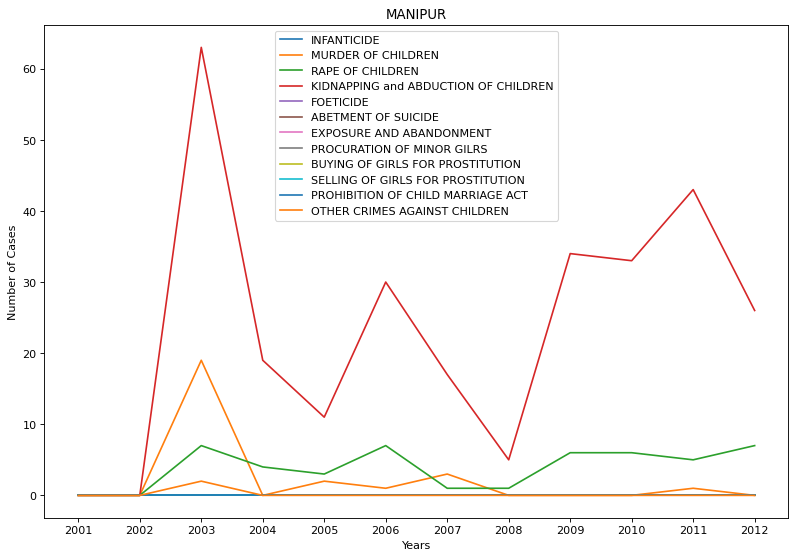

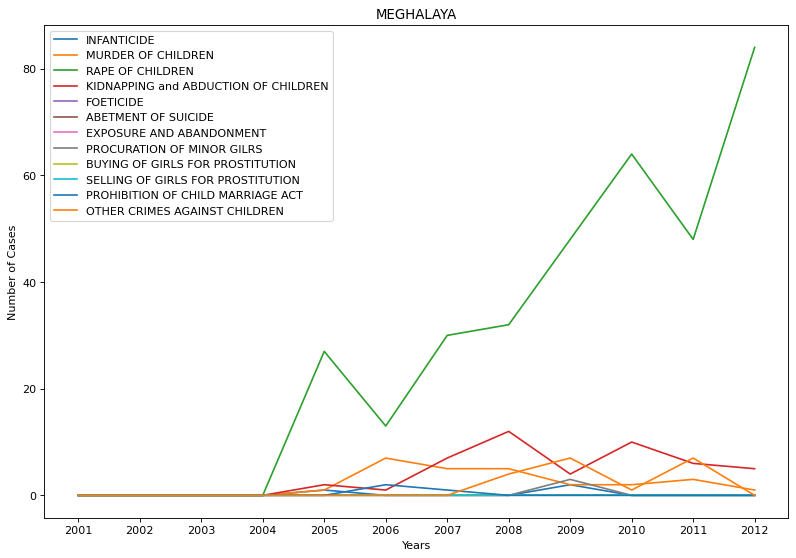

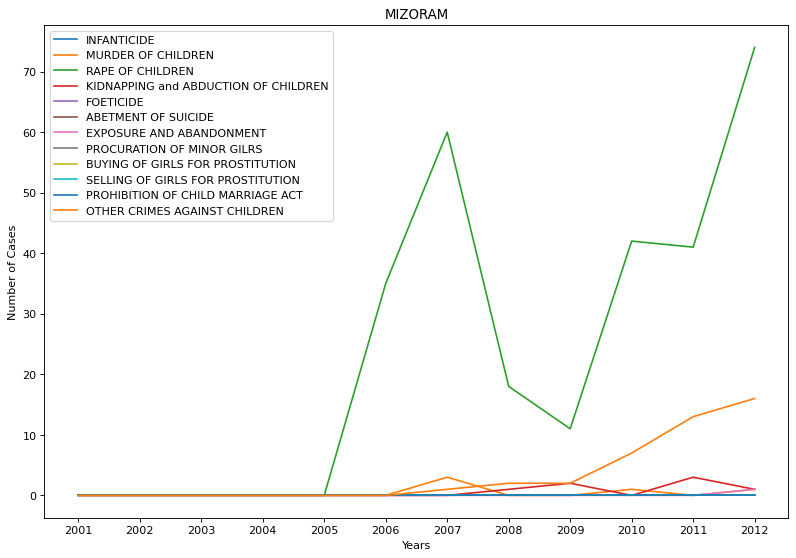

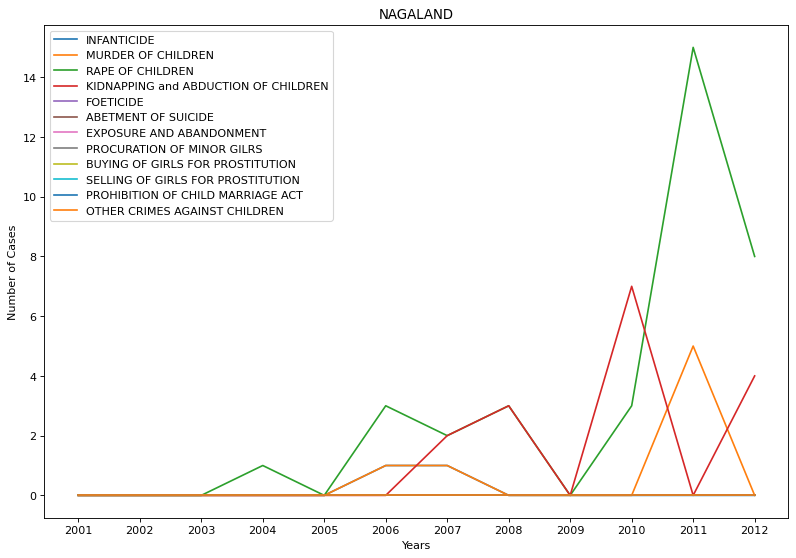

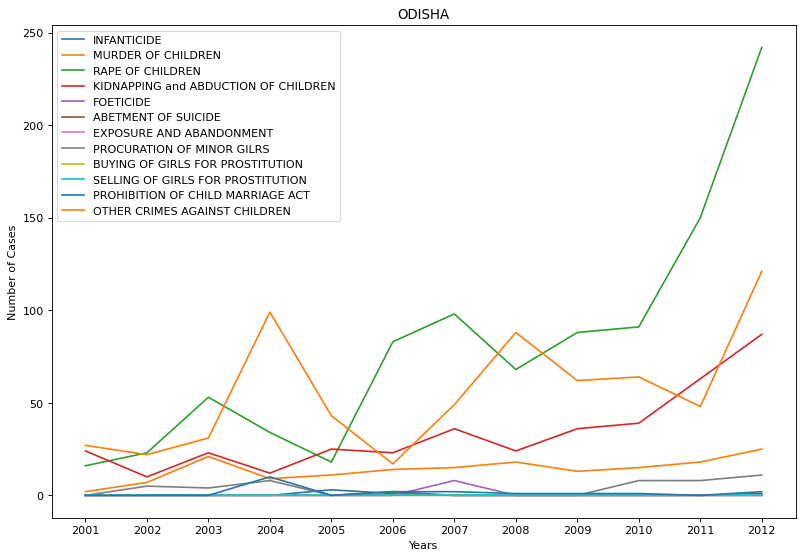

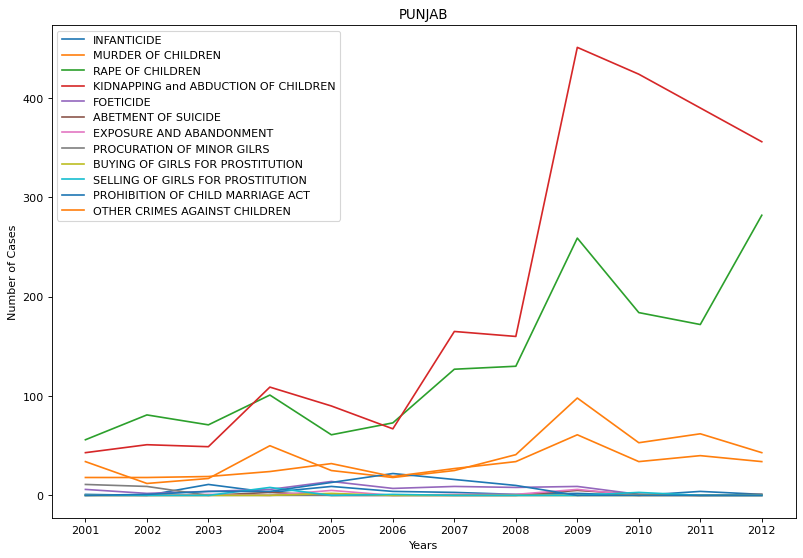

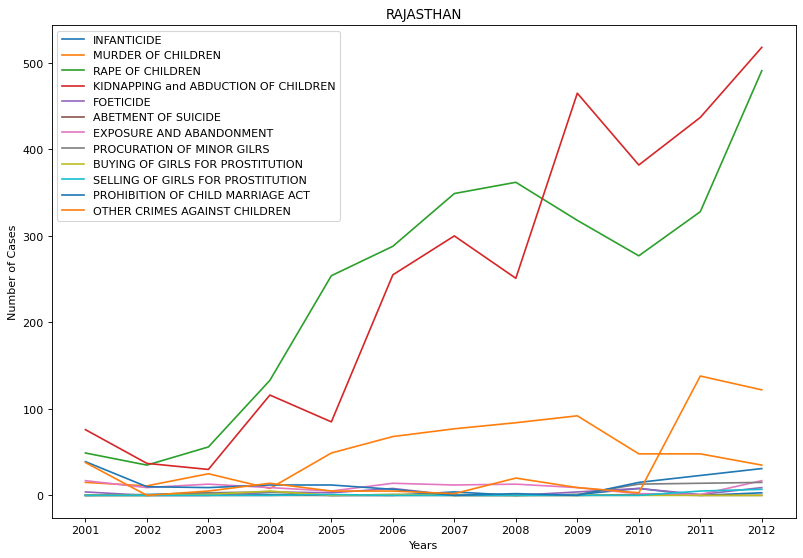

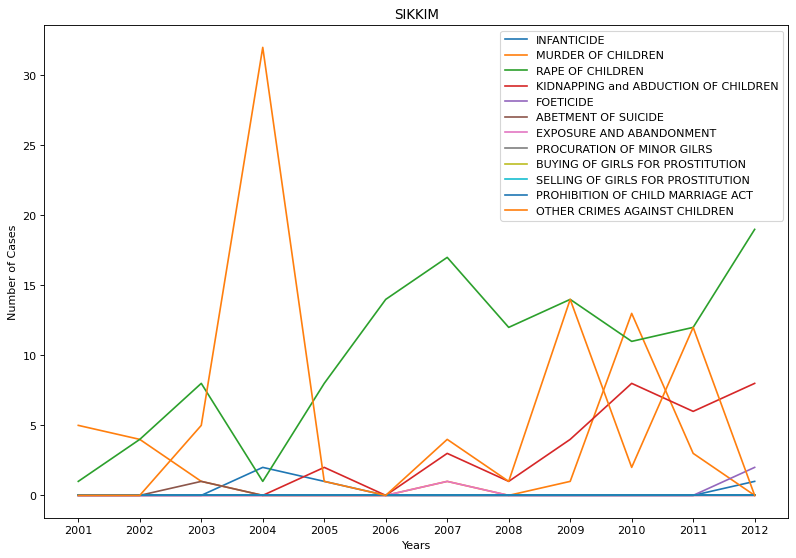

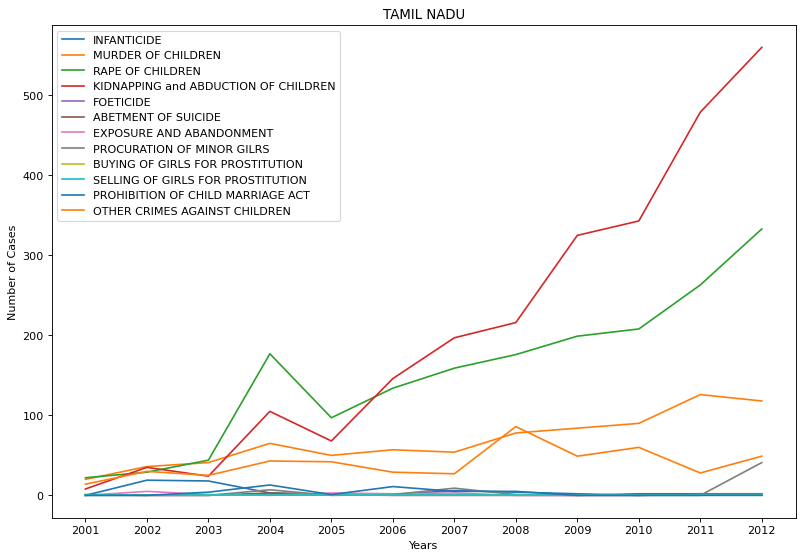

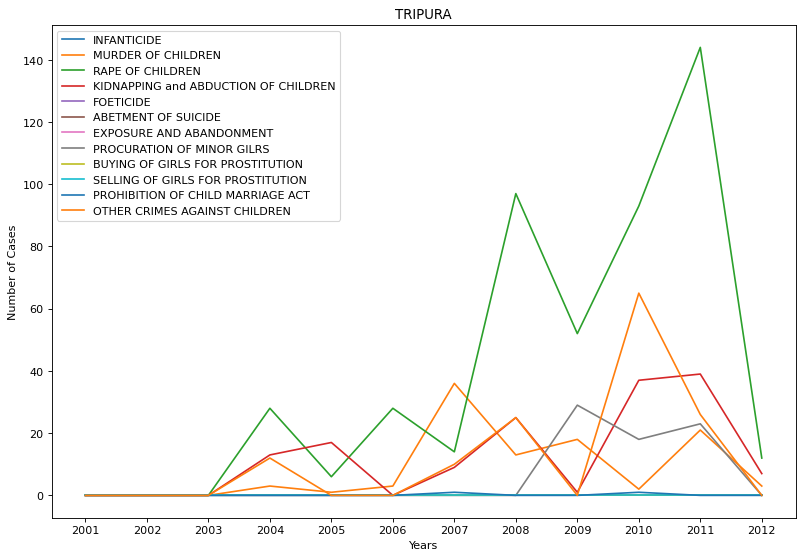

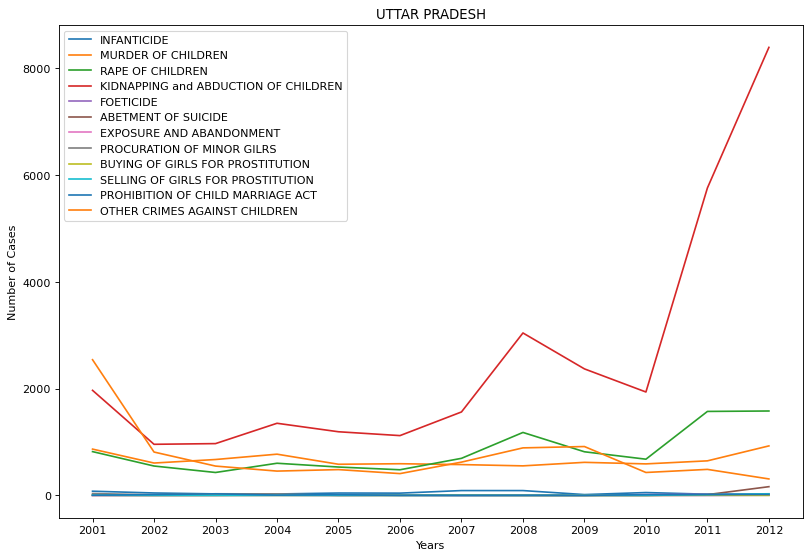

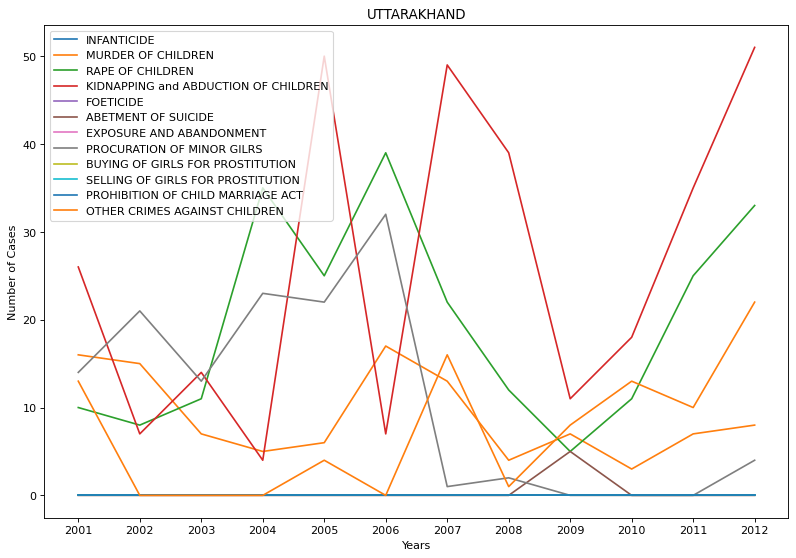

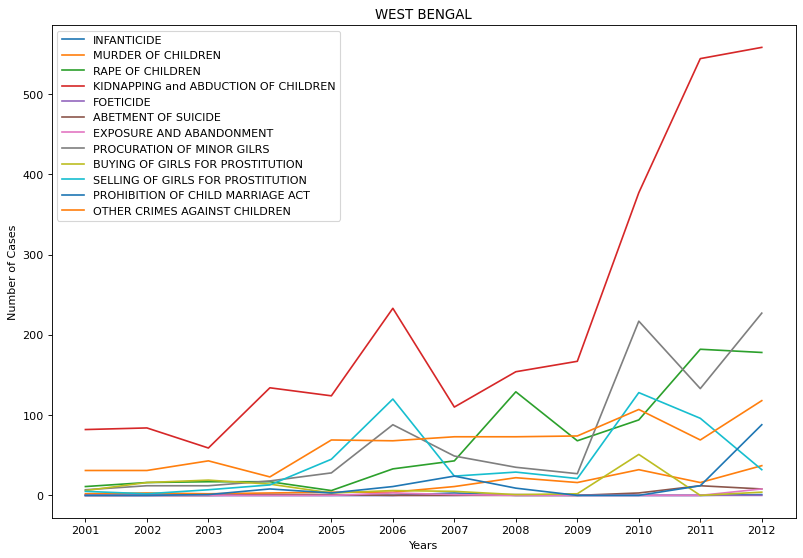

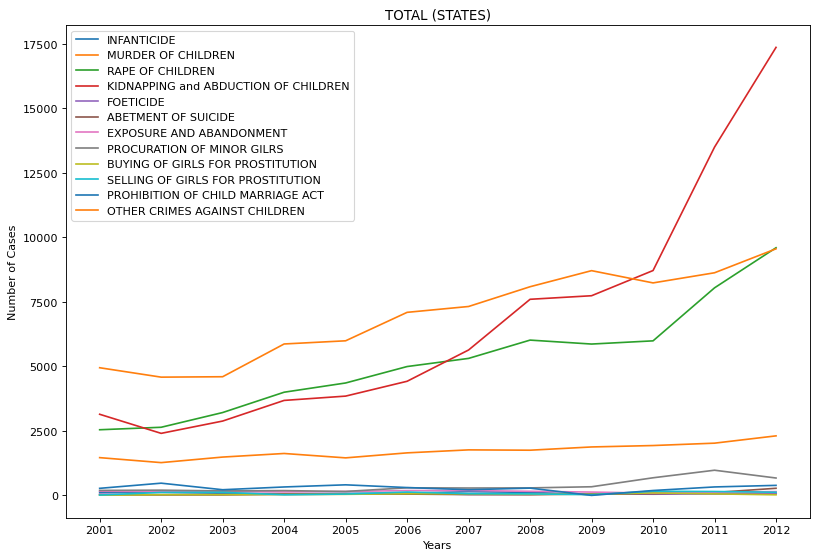

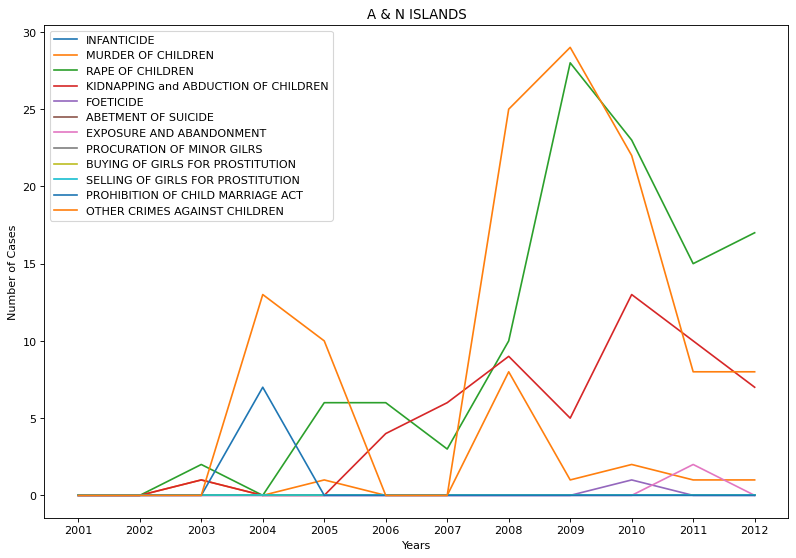

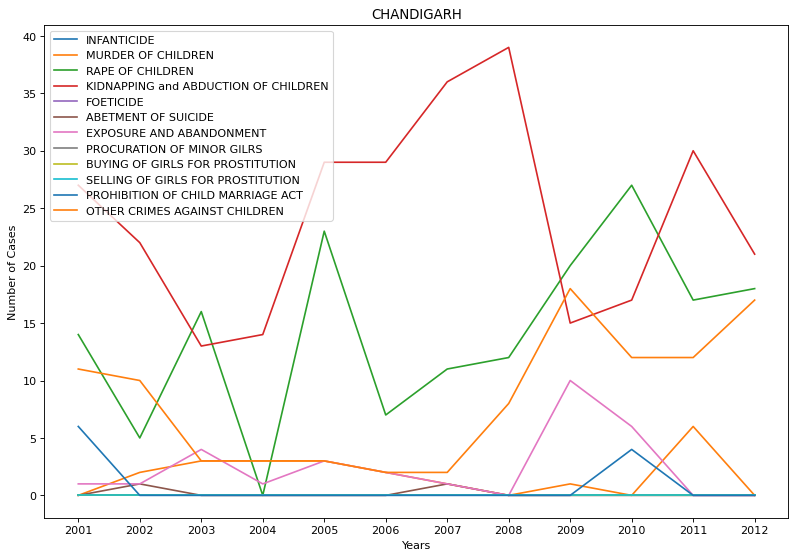

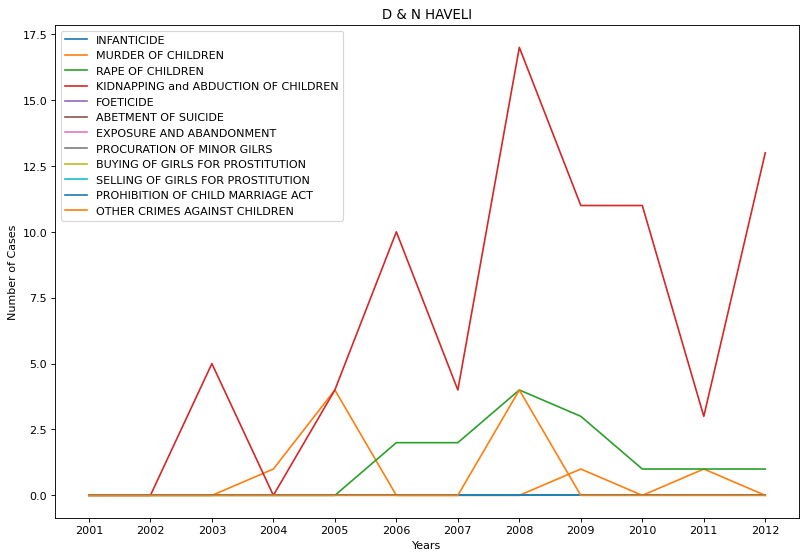

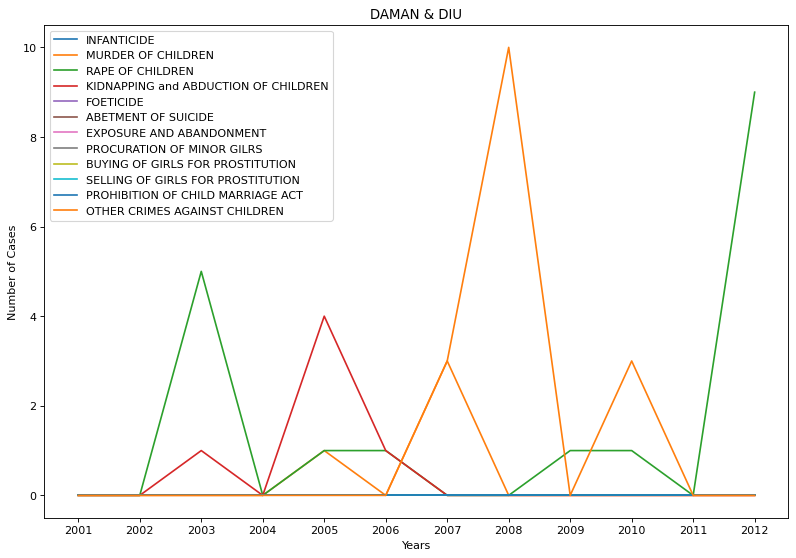

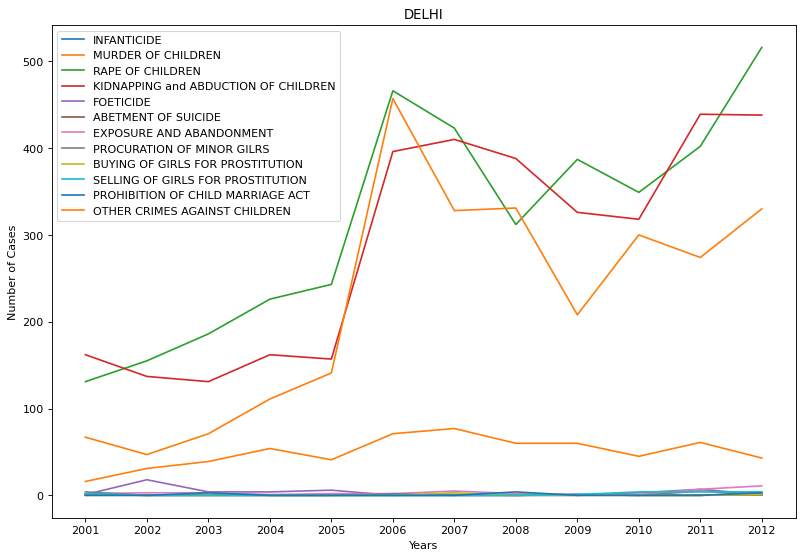

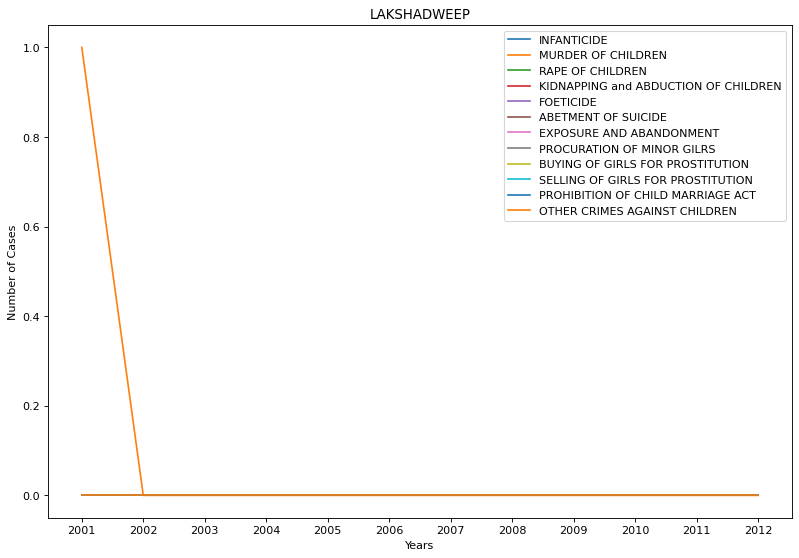

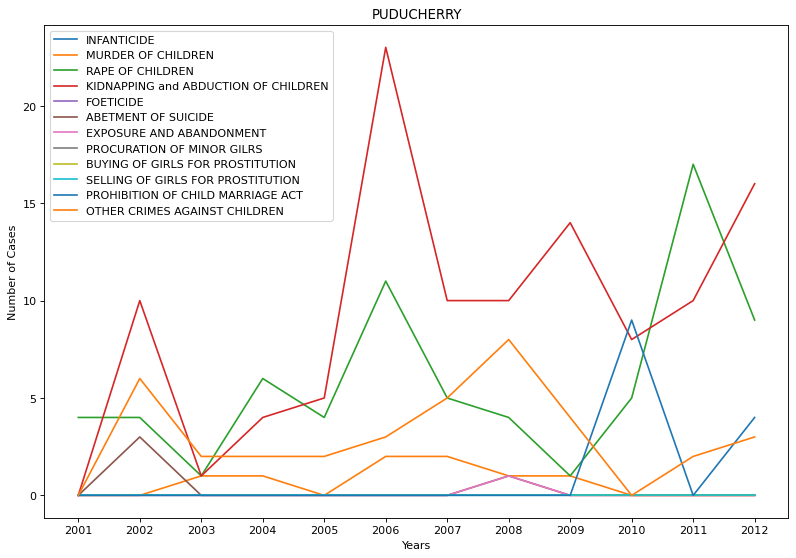

In [5]:
for state in statesInIndia:
  fig = plt.figure(figsize = (12, 8), dpi =  80, facecolor = 'w', edgecolor = 'k')
  plt.title(state)
  plt.xlabel('Years')
  plt.ylabel('Number of Cases')
  for case in typesOfCases:
    temp_df = df[(df['STATE/UT'] == state) & (df['CRIME HEAD'] == case)]
    n_cases = [temp_df[c].values[0] for c in years_title]
    plt.plot(years_title, n_cases)
    plt.legend(typesOfCases)

In [6]:
print('Data set:')
for col_name in df.columns:
  if df[col_name].dtypes == 'object':
    unique_cat = len(df[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name = col_name, unique_cat = unique_cat))

print()

Data set:
Feature 'STATE/UT' has 38 categories
Feature 'CRIME HEAD' has 13 categories



In [7]:
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()

#df['STATE/UT'] = lab.fit_transform(df['STATE/UT'])
df['CRIME HEAD'] = lab.fit_transform(df['CRIME HEAD'])

df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 9)
kmeans.fit(df.iloc[:, 1:])

KMeans(n_clusters=9)

In [9]:
kmeans.cluster_centers_

array([[6.03233256e+00, 8.63972286e+00, 1.01593533e+01, 1.06397229e+01,
        1.14457275e+01, 1.33648961e+01, 1.63995381e+01, 1.62124711e+01,
        1.68036952e+01, 1.58614319e+01, 1.95404157e+01, 2.21639723e+01,
        2.76120092e+01],
       [0.00000000e+00, 1.31760000e+04, 1.22795000e+04, 1.32760000e+04,
        1.63565000e+04, 1.70065000e+04, 2.01205000e+04, 2.17610000e+04,
        2.51320000e+04, 2.54385000e+04, 2.68105000e+04, 3.47600000e+04,
        4.13695000e+04],
       [7.33333333e+00, 2.28133333e+03, 2.87533333e+03, 3.43466667e+03,
        4.25466667e+03, 4.64800000e+03, 5.18233333e+03, 5.45766667e+03,
        6.00133333e+03, 6.00166667e+03, 6.07866667e+03, 7.37733333e+03,
        8.96933333e+03],
       [6.00000000e+00, 3.24050000e+03, 2.49050000e+03, 2.95900000e+03,
        3.77300000e+03, 3.94950000e+03, 4.65650000e+03, 5.87100000e+03,
        7.83450000e+03, 7.92650000e+03, 8.90150000e+03, 1.37480000e+04,
        1.76155000e+04],
       [4.69230769e+00, 5.93615385e+

In [10]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,
       7, 4, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 7,
       0, 0, 7, 2, 7, 0, 0, 4, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0,
       0, 0, 7, 7, 0, 7, 0, 5, 0, 7, 3, 0, 0, 0, 0, 7, 0, 0, 7, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0,

In [11]:
unique, counts = np.unique(kmeans.labels_, return_counts = True)

dict_data = dict(zip(unique, counts))
dict_data

{0: 433, 1: 2, 2: 3, 3: 2, 4: 13, 5: 3, 6: 2, 7: 35, 8: 1}

In [12]:
df["cluster"] = kmeans.labels_

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


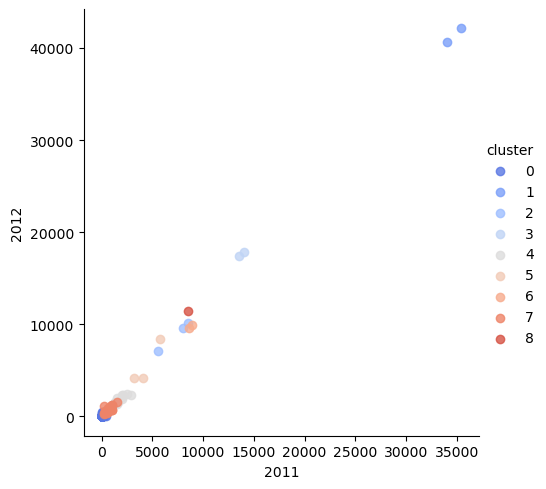

In [13]:
import seaborn as sns

sns.lmplot('2011', '2012', data = df, hue = 'cluster', palette = 'coolwarm', size = 5, aspect = 1, fit_reg = False)

In [14]:
# Inertia is the sum of squared error for each cluster
# Therefor the smaller the inertia the denser the cluster (closer together all the points are)

kmeans.inertia_

111242698.45688145

In [15]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=9)>

In [16]:
df

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cluster
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6,0
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0,0
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2,0
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DELHI,0,386,391,437,558,590,1394,1247,1097,984,1020,1199,1351,4
490,LAKSHADWEEP,0,1,0,0,0,0,0,0,0,0,0,0,0,0
491,PUDUCHERRY,0,4,23,5,13,11,39,22,25,20,22,29,32,0
492,TOTAL (UTs),0,450,455,496,613,693,1499,1342,1268,1147,1185,1334,1495,4


In [17]:
cust = [[7, 871, 1002, 946, 1016, 935, 1049, 1070, 1257, 1188, 1362, 1442, 1341]]
kmeans.predict(cust)[0]

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


4

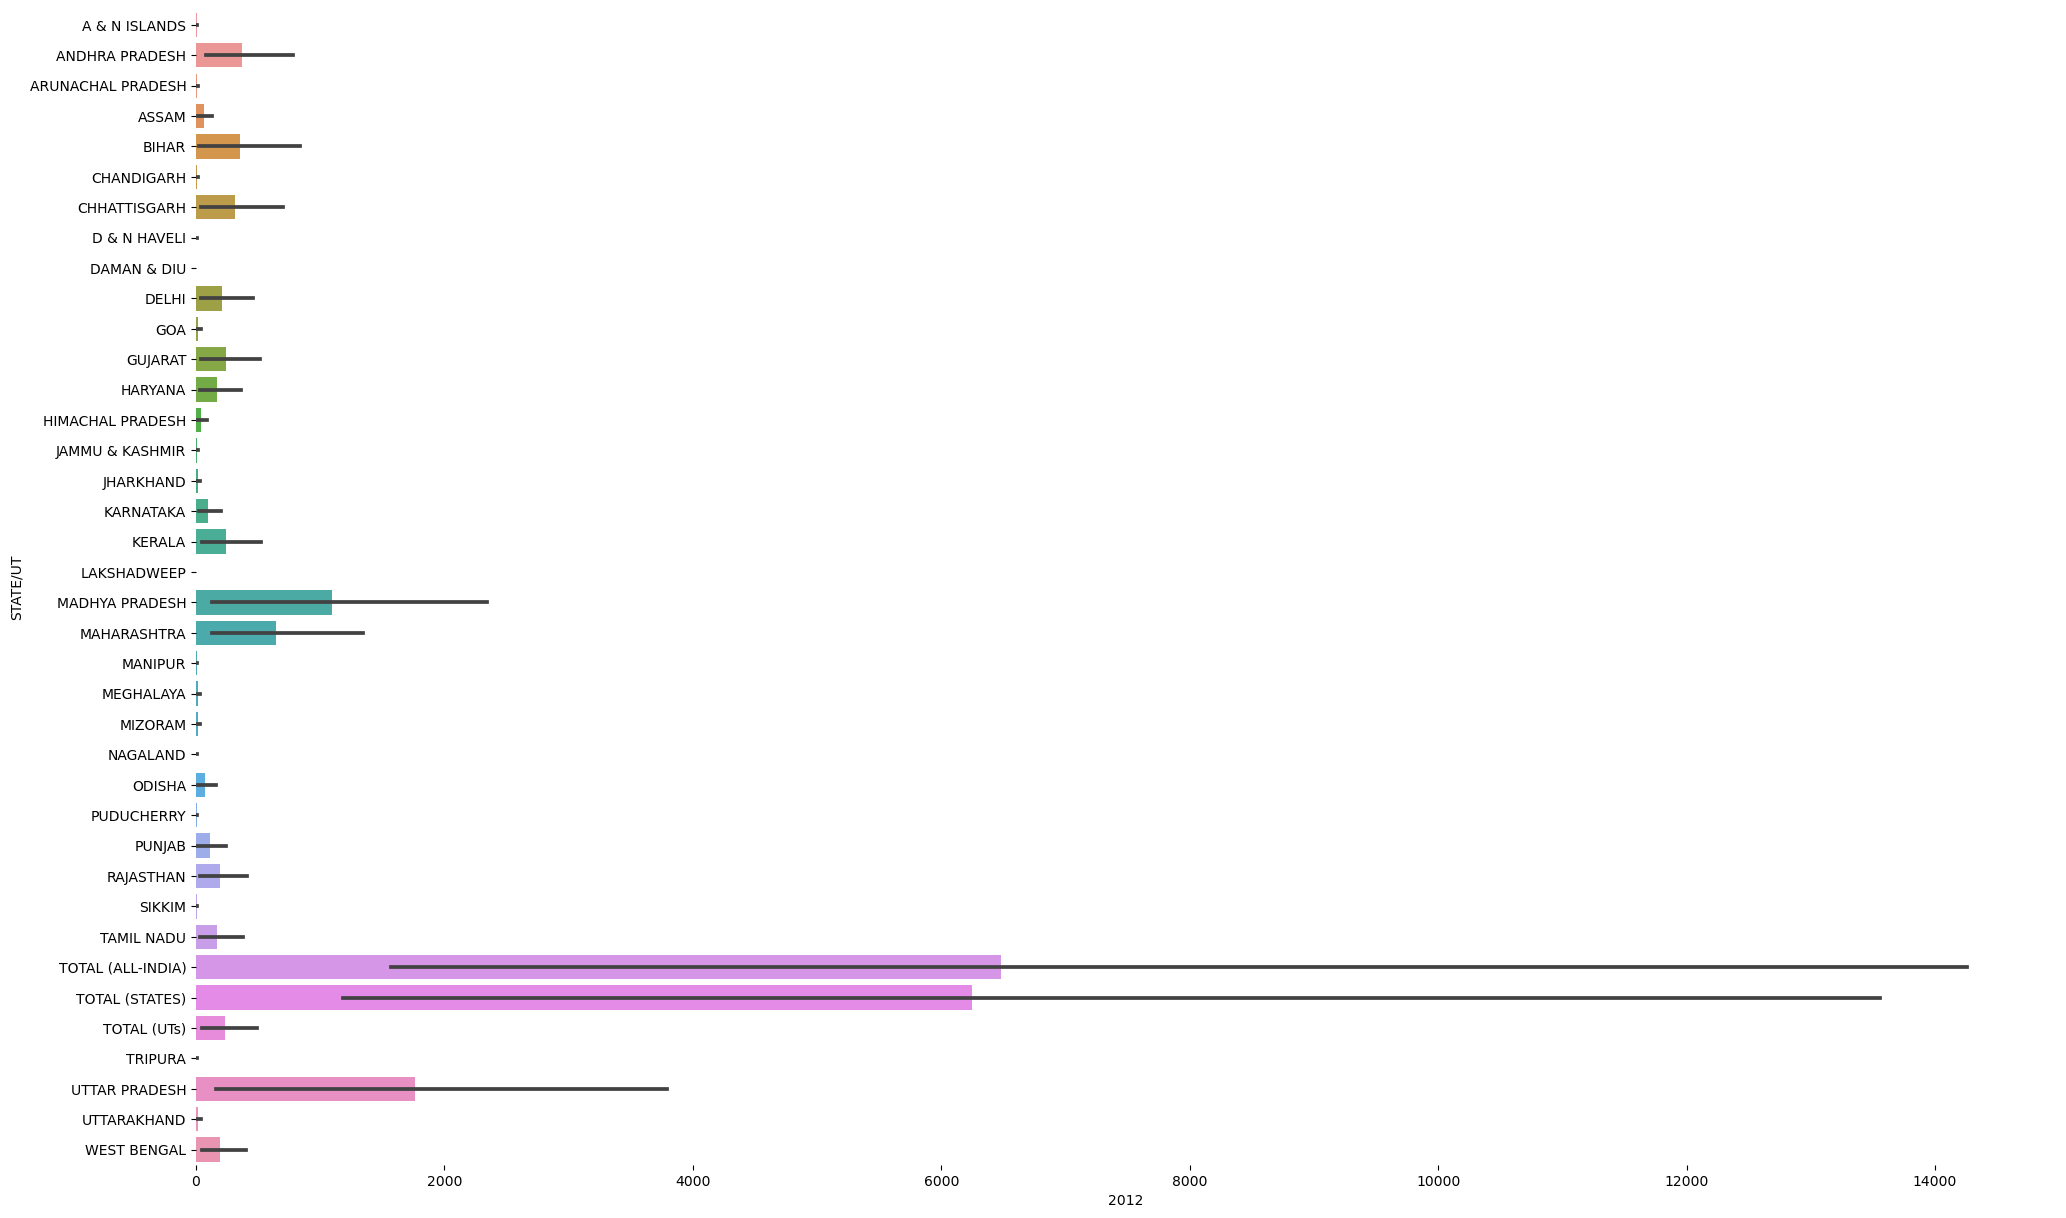

In [18]:
# Inizialize the matplotlib figure
f, ax = plt.subplots(figsize = (24, 15))

# Load the dataset
stats = df.sort_values(["cluster", "STATE/UT"], ascending = True)
sns.set_color_codes("pastel")
sns.barplot(y = "STATE/UT", x = "2012", data = stats)

sns.despine(left = True, bottom = True)

In [19]:
x = df.iloc[:, 1:14]
y = df.iloc[:, df.columns == 'cluster']

print(x.head())

y.head()

   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           5     1     1     3     0     0     0     1     0     5     6   
1           5     0     0     0     0     0     0     0     0     0     0   
2           5     0     5     0     0     1     0     0     0     0     0   
3           5     0     0     0     0     2     0     2     2     0     2   
4           5     7    29     5    12     0    15    11     6     2     0   

   2011  2012  
0     1     6  
1     0     0  
2     0     0  
3     5     2  
4    10     5  


,cluster
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(y_pred)

from sklearn.metrics import accuracy_score, classification_report
acc1 = accuracy_score(y_pred, y_test)
print(acc1)

clf = classification_report(y_pred, y_test)
print(clf)

[0 0 0 0 7 0 0 0 0 0 0 7 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0
 0 0 0 0 0 0 2 4 0 0 0 0 4 0 6 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 2 0 0
 0 0 4 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.9595959595959596
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         2
           4       0.75      1.00      0.86         3
           6       1.00      0.33      0.50         3
           7       0.75      0.75      0.75         4

    accuracy                           0.96        99
   macro avg       0.75      0.68      0.68        99
weighted avg       0.98      0.96      0.97        99



C:\Users\pspma\AppData\Local\Temp\ipykernel_20528\1671345730.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 i

In [22]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train, y_train)
predic2 = lg.predict(x_test)
acc2 = accuracy_score(predic2, y_test)
print(acc2)

clf2 = classification_report(predic2, y_test)
print(clf2)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0.797979797979798
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        75
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           4       0.50      0.33      0.40         6
           5       0.00      0.00      0.00         2
           6       1.00      0.11      0.20         9
           7       0.50      0.50      0.50         4
           8       0.00      0.00      0.00         2

    accuracy                           0.80        99
   macro avg       0.36      0.24      0.25        99
weighted avg       0.79      0.80      0.76        99



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

In [23]:
from sklearn import svm

sv = svm.LinearSVC()
sv.fit(x_train, y_train)
predic3 = sv.predict(x_test)
acc3 = accuracy_score(predic3, y_test)
print(acc3)

clf3 = classification_report(predic3, y_test)
print(clf3)

0.8383838383838383
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2

    accuracy                           0.84        99
   macro avg       0.14      0.14      0.14        99
weighted avg       0.81      0.84      0.82        99



D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

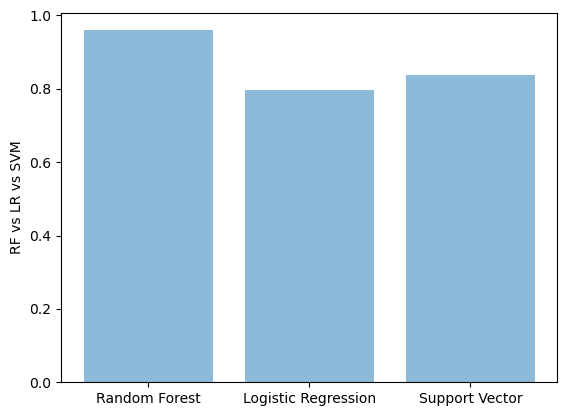

In [24]:
plt.rcdefaults()

objects = ('Random Forest', 'Logistic Regression', 'Support Vector')
y_pos = np.arange(len(objects))
performance = [acc1, acc2, acc3]

plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RF vs LR vs SVM')
plt.show()